## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt 


To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

#### Plot X vs. y

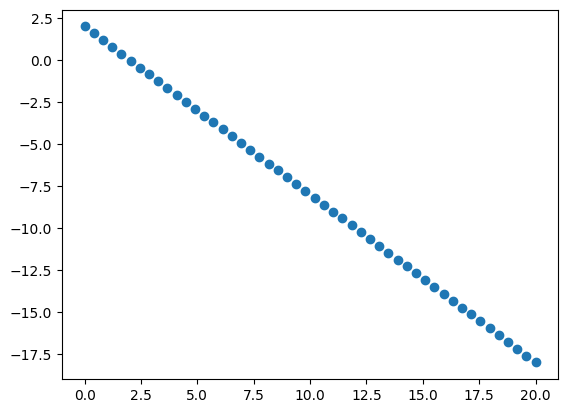

In [4]:
plt.scatter(X,y)

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

In [ ]:
def ada_grad_gd_single_var(X, y, LR=0.01, TOL=1E-6, MAX_ITER=1000):
   
    m = len(X)
    
    # Initialize
    theta_0 = 0.0
    theta_1 = 0.0

    momentum_0 = 0
    momentum_1 = 0
    
    loss_history = []
    theta0_history = [theta_0]
    theta1_history = [theta_1]
    
    for iter in range(MAX_ITER):
        # Predict
        h_x = theta_0 + theta_1 * X
        
        # Loss
        error = h_x - y
        j = np.sum(error**2) / (2 * m)
        loss_history.append(j)

        # Grad
        grad_theta_0 = (1/m) * np.sum(error)
        grad_theta_1 = (1/m) * np.sum(error * X)

        # momentum
        momentum_0 = momentum_0 + (grad_theta_0**2)
        momentum_1 = momentum_1 + (grad_theta_1 ** 2)
        
        # Update parameters SIMULTANEOUSLY
        theta_0 -= (1/(np.sqrt(momentum_0) + 1E-8 )) * LR * grad_theta_0
        theta_1 -= (1/(np.sqrt(momentum_1) + 1E-8 )) * LR * grad_theta_1
        
        # Append to history AFTER update
        theta0_history.append(theta_0)
        theta1_history.append(theta_1)
        
        # Convergence check
        if iter > 0 and np.abs(loss_history[-1] - loss_history[-2]) < TOL:
            print(f'Converged at iteration {iter}')
            break
    
    return theta_0, theta_1, loss_history, theta0_history, theta1_history

In [6]:
def plot_loss_vs_epochs(loss_history, title="Loss vs Epochs"):
    """Plot loss vs epochs"""
    plt.figure(figsize=(10, 6))
    plt.plot(loss_history, marker = 'o', linewidth=2)
    plt.xlabel('Epochs')
    plt.ylabel('Loss (MSE)')
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.show()

def plot_theta_vs_loss(theta_0_hist, theta_1_hist, loss_hist):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    axes[0].plot(theta_0_hist, loss_hist , marker = 'o' )
    axes[0].set_xlabel('Theta_0')
    axes[0].set_ylabel('Loss')
    axes[0].set_title('Loss vs Theta_0')
    axes[0].grid(True)
    
    axes[1].plot(theta_1_hist, loss_hist, marker = 'o')
    axes[1].set_xlabel('Theta_1')
    axes[1].set_ylabel('Loss')
    axes[1].set_title('Loss vs Theta_1')
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()

def plot_loss_surface(theta0_history, theta1_history, X, y, title="Loss Surface with Gradient Descent Path"):
    """Plot loss surface with parameter trajectory"""
    # Create mesh
    theta0_range = np.linspace(min(theta0_history)-1, max(theta0_history)+1, 50)
    theta1_range = np.linspace(min(theta1_history)-1, max(theta1_history)+1, 50)
    T0, T1 = np.meshgrid(theta0_range, theta1_range)
    
    # Calculate loss for each point
    m = len(X)
    Z = np.zeros_like(T0)
    for i in range(len(theta0_range)):
        for j in range(len(theta1_range)):
            h = T0[j,i] + T1[j,i] * X
            Z[j,i] = (1/(2*m)) * np.sum((h - y)**2)
    
    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Contour plot
    contour = ax1.contour(T0, T1, Z, levels=20, cmap='viridis')
    ax1.plot(theta0_history, theta1_history, 'r.-', linewidth=2, markersize=3)
    ax1.plot(theta0_history[0], theta1_history[0], 'go', markersize=10, label='Start')
    ax1.plot(theta0_history[-1], theta1_history[-1], 'r*', markersize=15, label='End')
    ax1.set_xlabel('θ₀')
    ax1.set_ylabel('θ₁')
    ax1.set_title('Loss Contour (θ₀ vs θ₁)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    plt.colorbar(contour, ax=ax1)
    
    # 3D surface
    from mpl_toolkits.mplot3d import Axes3D
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.plot_surface(T0, T1, Z, alpha=0.6, cmap='viridis')
    ax2.plot(theta0_history, theta1_history, [np.interp(theta0_history[i], theta0_range, 
             [((theta0_history[i] + theta1_history[i] * X - y)**2).mean()/2 for _ in range(1)])[0] 
             for i in range(len(theta0_history))], 'r.-', linewidth=2, markersize=3)
    ax2.set_xlabel('θ₀')
    ax2.set_ylabel('θ₁')
    ax2.set_zlabel('Loss')
    ax2.set_title('3D Loss Surface')
    
    plt.tight_layout()
    plt.show()

def plot_fitted_lines(X, y, theta0_history, theta1_history, sample_every=10, title="Fitted Lines During Training"):
    """Plot all fitted lines during training"""
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', alpha=0.6, label='Data', zorder=5)
    
    # Plot lines at intervals
    for i in range(0, len(theta0_history), sample_every):
        y_pred = theta0_history[i] + theta1_history[i] * X
        alpha_val = i / len(theta0_history)
        plt.plot(X, y_pred, 'r-', alpha=alpha_val * 0.5 + 0.1, linewidth=1)
    
    # Plot final line
    y_final = theta0_history[-1] + theta1_history[-1] * X
    plt.plot(X, y_final, 'g-', linewidth=3, label='Final fit', zorder=4)
    
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


##### The following results uses alpha = 0.05, epsilon =  1e-08, and max. iterations = 500.

In [8]:
from sklearn.metrics import r2_score
theta_0_ada, theta_1_ada, loss_history_ada, theta0_history_ada, theta1_history_ada = \
ada_grad_gd_single_var (X, y, LR= .05, MAX_ITER= 500)
h_ada = theta_0_ada + theta_1_ada* X
r2_score(y, h_ada)

0.9568765570806219

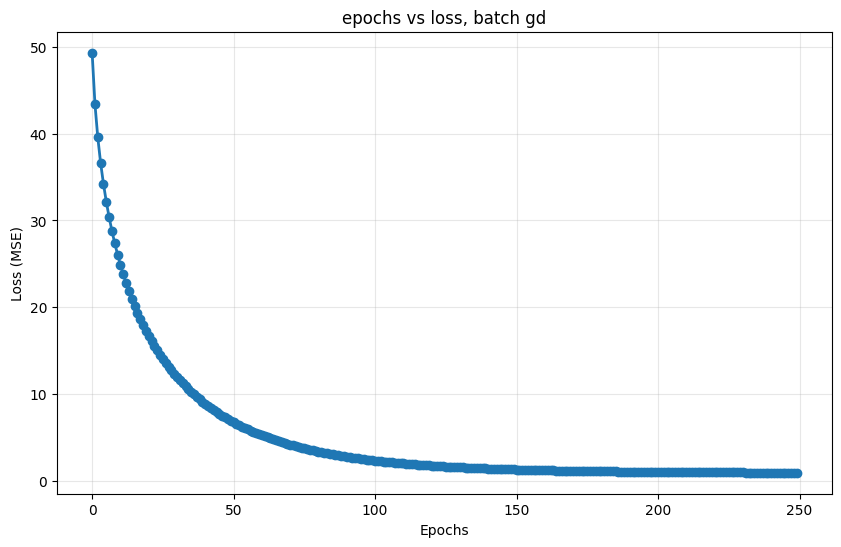

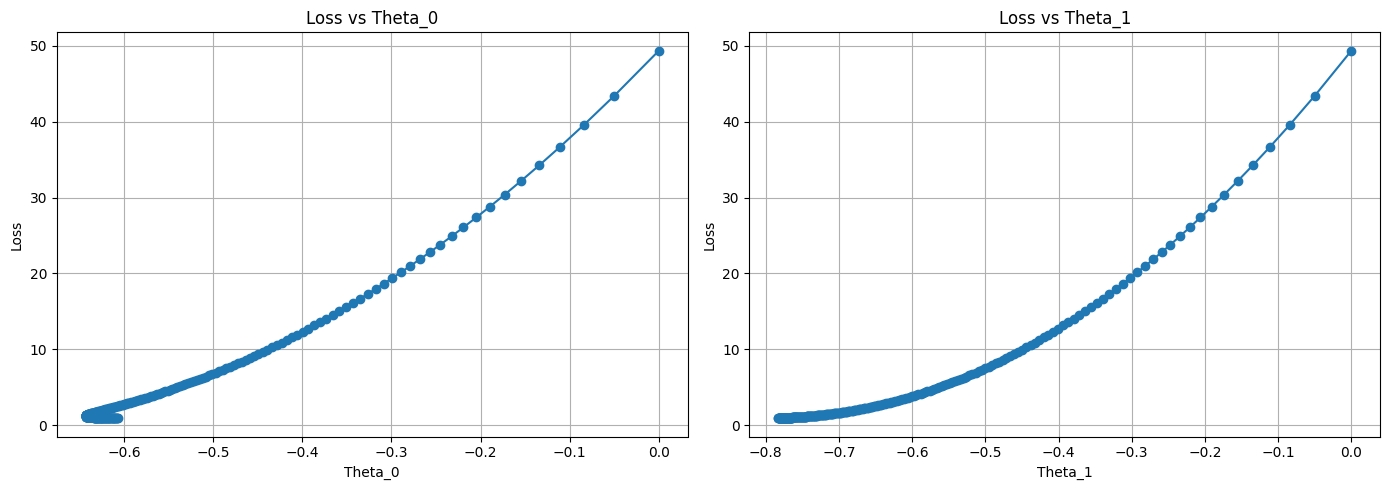

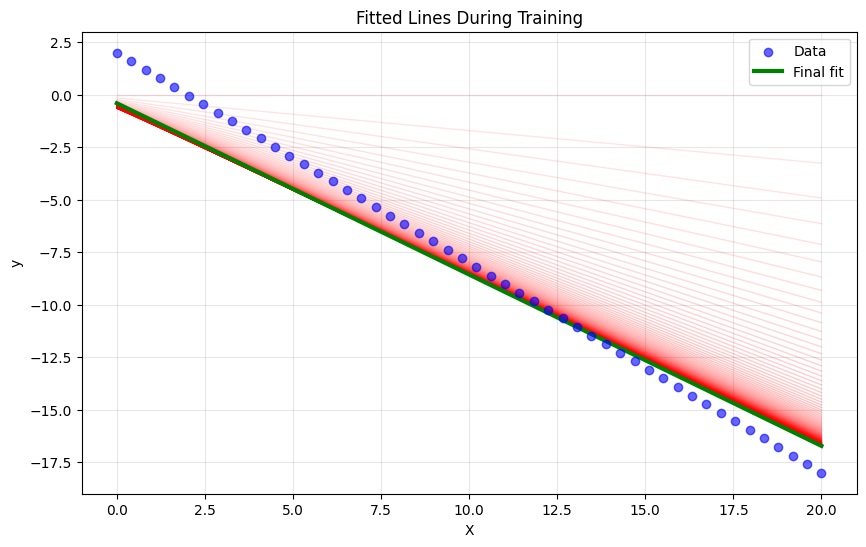

In [10]:
plot_loss_vs_epochs(loss_history_ada[:250], 'epochs vs loss, batch gd')
plot_theta_vs_loss(theta0_history_ada[:250], theta1_history_ada[:250], loss_history_ada[:250])
plot_fitted_lines(X, y, theta0_history_ada, theta1_history_ada, 5)


##### The following results uses alpha = 0.005, epsilon =  1e-08, and max. iterations = 5000.

0.7096780128246873


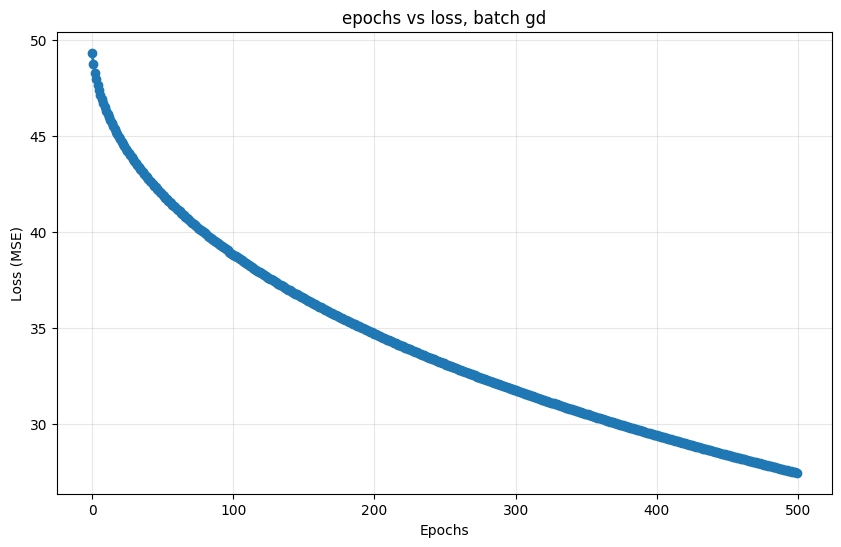

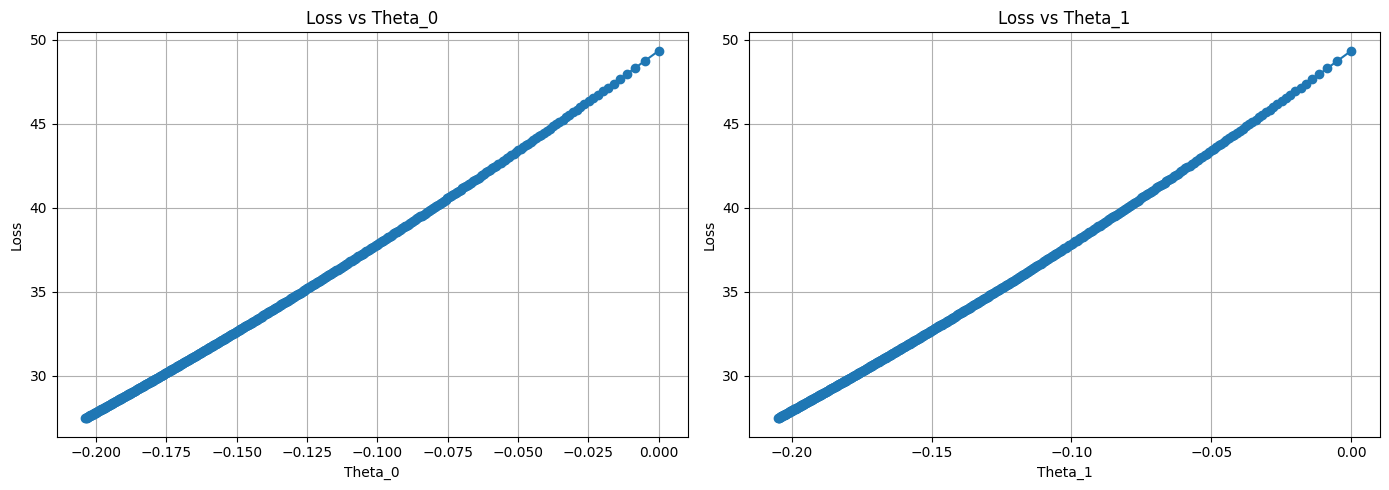

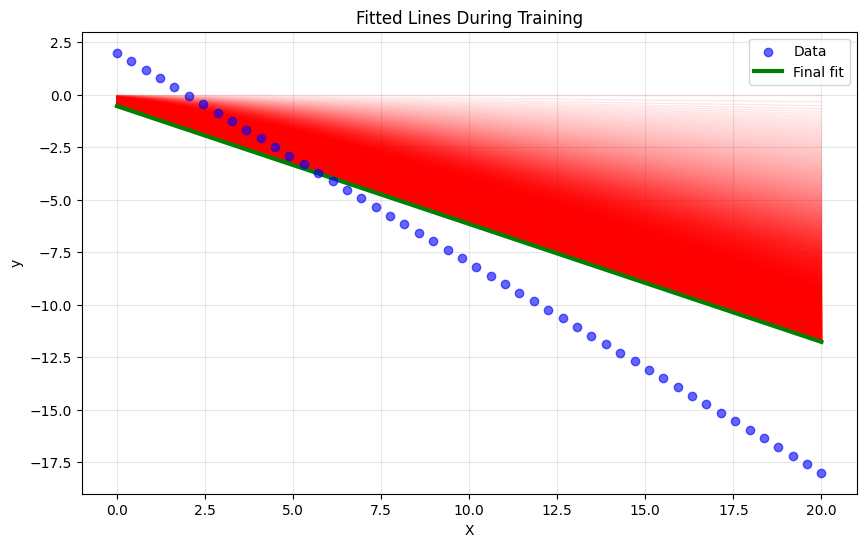

In [31]:
from sklearn.metrics import r2_score
theta_0_ada, theta_1_ada, loss_history_ada, theta0_history_ada, theta1_history_ada = \
ada_grad_gd_single_var (X, y, BETA = , LR= .005, MAX_ITER= 5000)
h_ada = theta_0_ada + theta_1_ada* X
print(r2_score(y, h_ada))
plot_loss_vs_epochs(loss_history_ada[:500], 'epochs vs loss, rms gd')
plot_theta_vs_loss(theta0_history_ada[:500], theta1_history_ada[:500], loss_history_ada[:500])
plot_fitted_lines(X, y, theta0_history_ada, theta1_history_ada, 5)


##### The following results uses alpha = 0.0005, epsilon =  1e-08, and max. iterations = 5000.

-1.3787035051189305


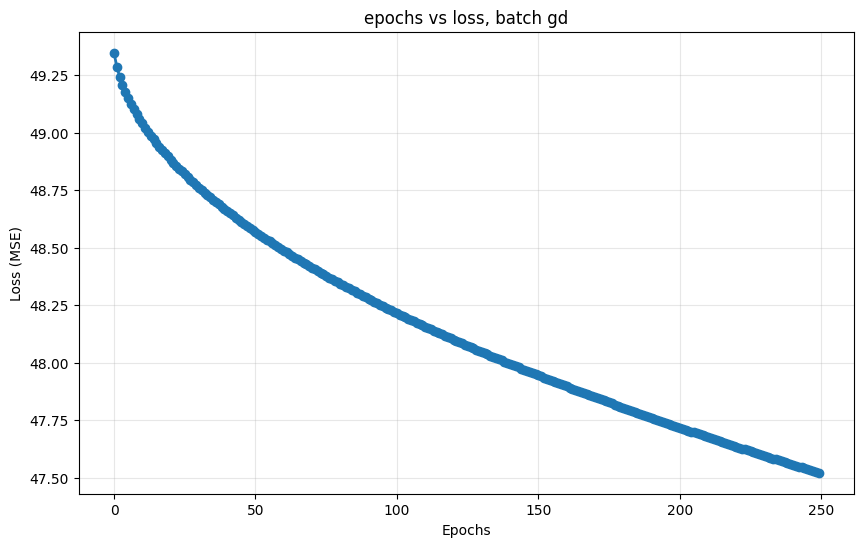

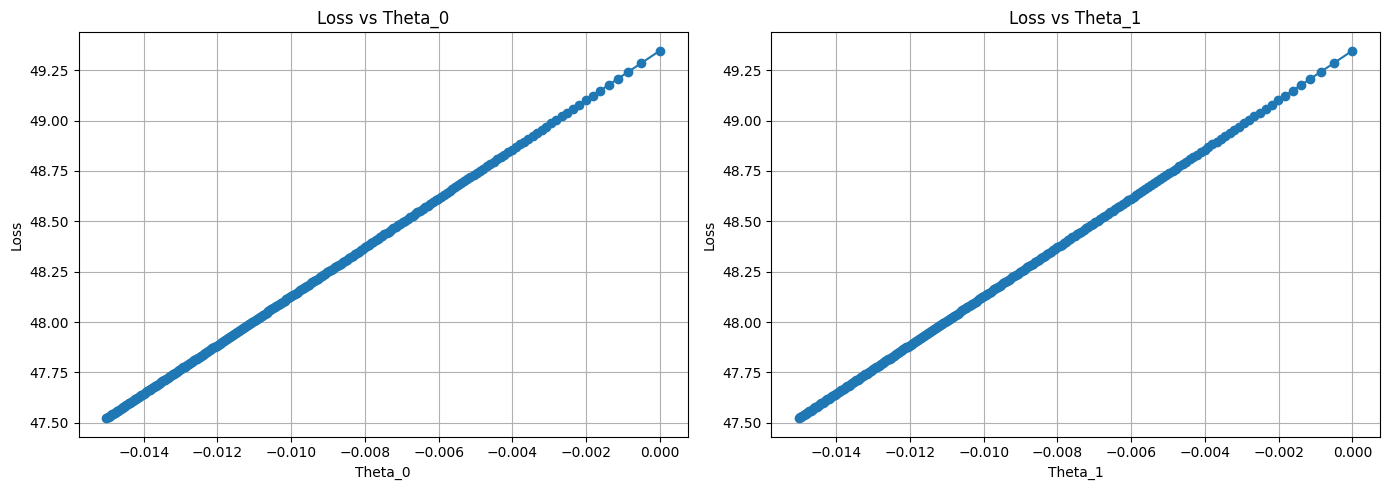

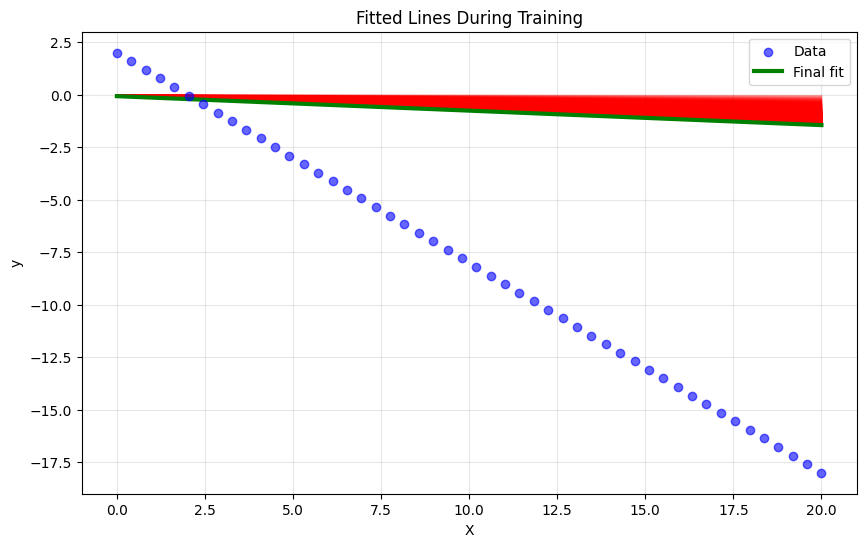

In [12]:
from sklearn.metrics import r2_score
theta_0_ada, theta_1_ada, loss_history_ada, theta0_history_ada, theta1_history_ada = \
ada_grad_gd_single_var (X, y, LR= .0005, MAX_ITER= 5000)
h_ada = theta_0_ada + theta_1_ada* X
print(r2_score(y, h_ada))
plot_loss_vs_epochs(loss_history_ada[:250], 'epochs vs loss, batch gd')
plot_theta_vs_loss(theta0_history_ada[:250], theta1_history_ada[:250], loss_history_ada[:250])
plot_fitted_lines(X, y, theta0_history_ada, theta1_history_ada, 5)


## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

In [28]:
def RMSProp_grad_gd_single_var(X, y, BETA = 0.1, LR=0.01, TOL=1E-6, MAX_ITER=1000):
   
    m = len(X)
    
    # Initialize
    theta_0 = 0.0
    theta_1 = 0.0

    momentum_0 = 0
    momentum_1 = 0
    
    loss_history = []
    theta0_history = [theta_0]
    theta1_history = [theta_1]
    
    for iter in range(MAX_ITER):
        # Predict
        h_x = theta_0 + theta_1 * X
        
        # Loss
        error = h_x - y
        j = np.sum(error**2) / (2 * m)
        
        loss_history.append(j)
        

        # Grad
        grad_theta_0 = (1/m) * np.sum(error)
        grad_theta_1 = (1/m) * np.sum(error * X)

        # momentum
        momentum_0 = BETA * momentum_0 + (1-BETA) * (grad_theta_0**2)
        momentum_1 = BETA * momentum_1 + (1-BETA) * (grad_theta_1 ** 2)
        
        # Update parameters SIMULTANEOUSLY
        theta_0 -= (1/(np.sqrt(momentum_0) + 1E-8 )) * LR * grad_theta_0
        theta_1 -= (1/(np.sqrt(momentum_1) + 1E-8 )) * LR * grad_theta_1
        
        theta0_history.append(theta_0)
        theta1_history.append(theta_1)
        
        
        # Convergence check
        if iter > 0 and np.abs(loss_history[-1] - loss_history[-2]) < TOL:
            print(f'Converged at iteration {iter}')
            break
    
    return theta_0, theta_1, loss_history, theta0_history, theta1_history

##### The following results uses alpha = 0.05, beta = 0.9, epsilon =  1e-08, and max. iterations = 500.

Converged at iteration 268
0.9971963472481796


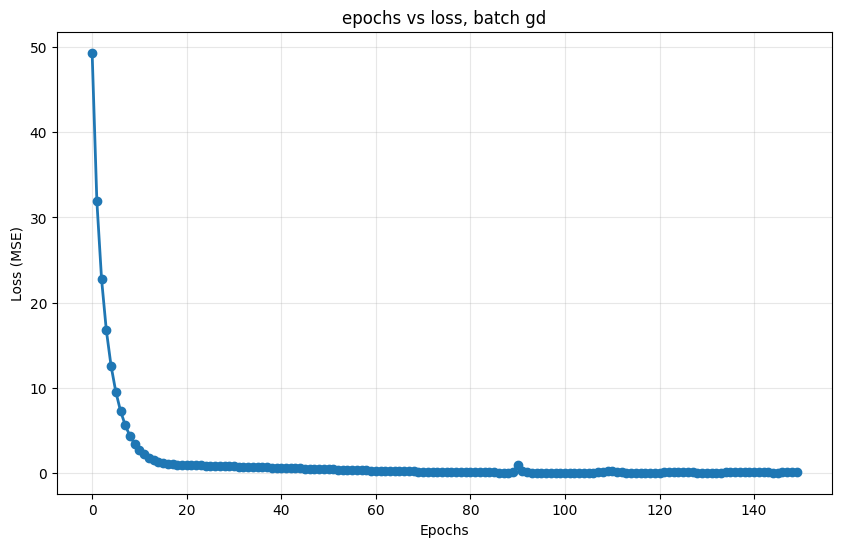

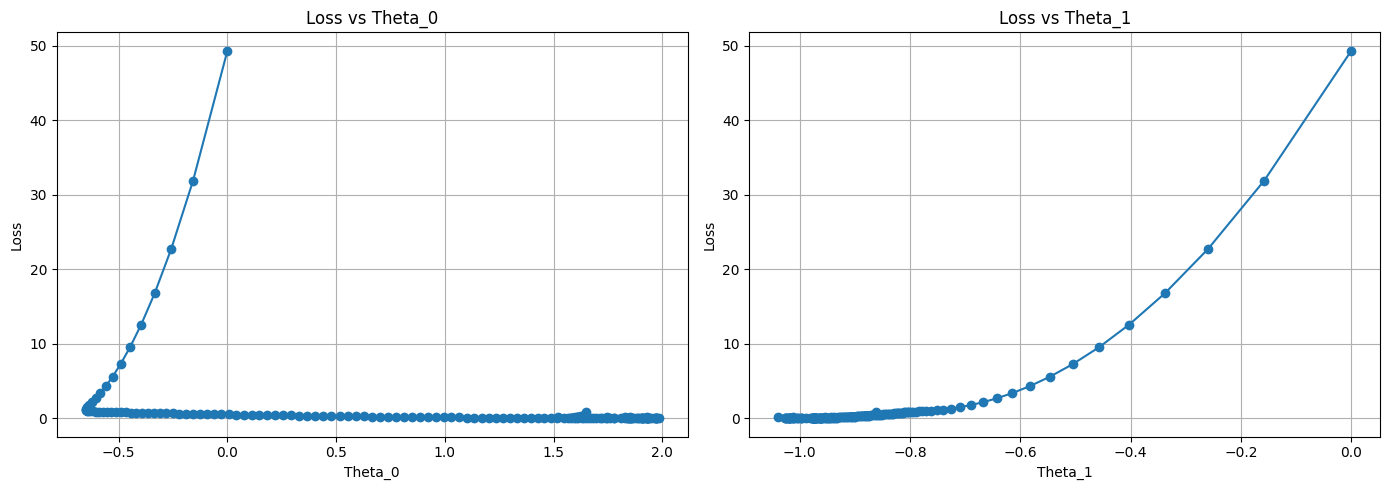

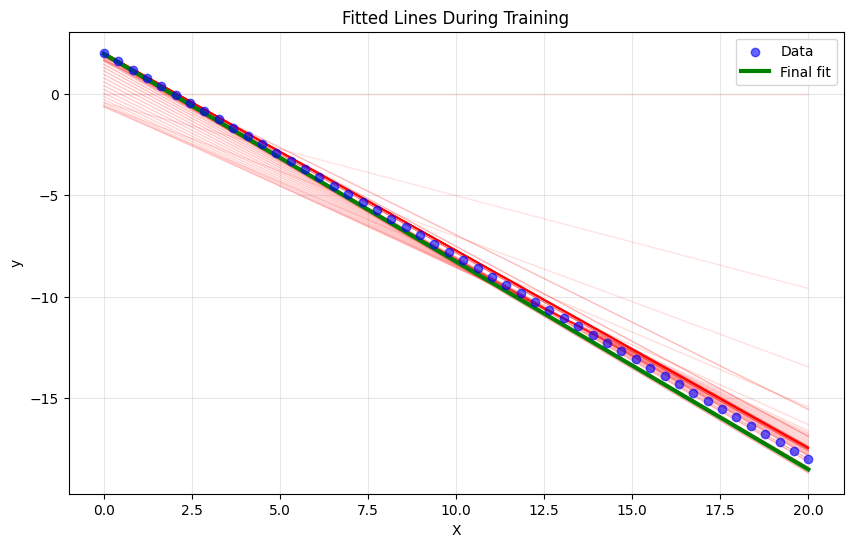

In [29]:
from sklearn.metrics import r2_score
theta_0_rms, theta_1_rms, loss_history_rms, theta0_history_rms, theta1_history_rms = \
RMSProp_grad_gd_single_var  (X, y, BETA= 0.9,LR= .05, MAX_ITER= 500)
h_rms = theta_0_rms + theta_1_rms* X
print(r2_score(y, h_rms))
plot_loss_vs_epochs(loss_history_rms[:150], 'epochs vs loss, batch gd')
plot_theta_vs_loss(theta0_history_rms[:150], theta1_history_rms[:150], loss_history_rms[:150])
plot_fitted_lines(X, y, theta0_history_rms, theta1_history_rms, 5)


##### The following results uses alpha = 0.005, beta = 0.9, epsilon =  1e-08, and max. iterations = 5000.

Converged at iteration 773
0.9999713492342694


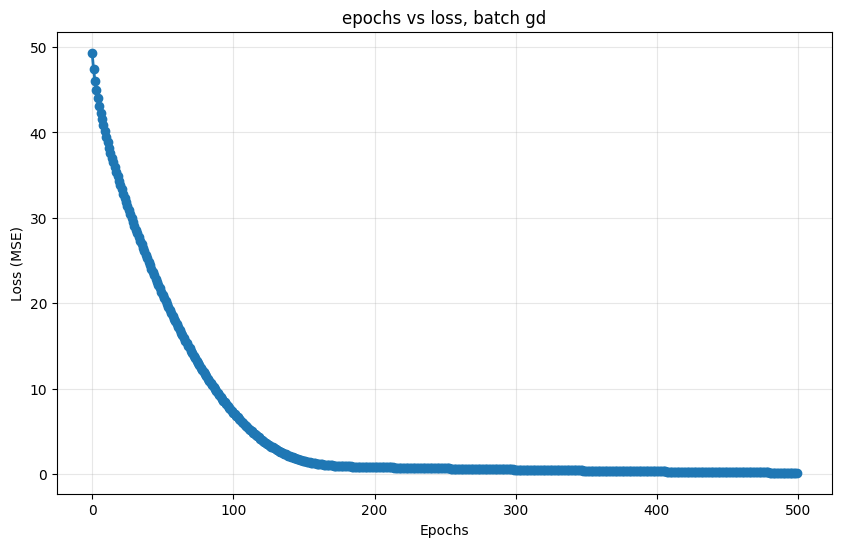

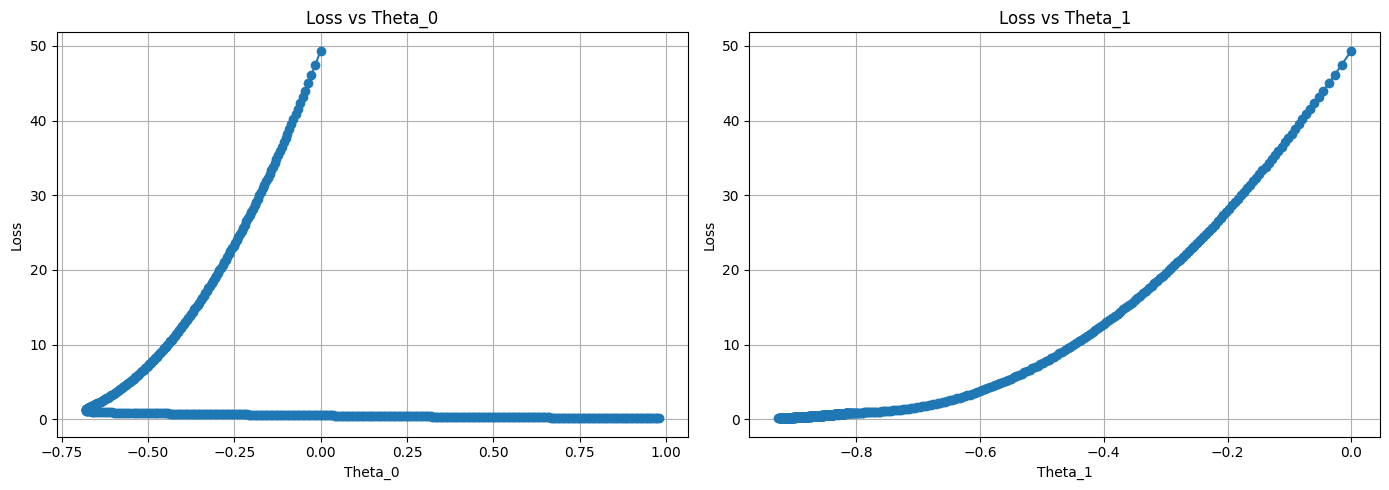

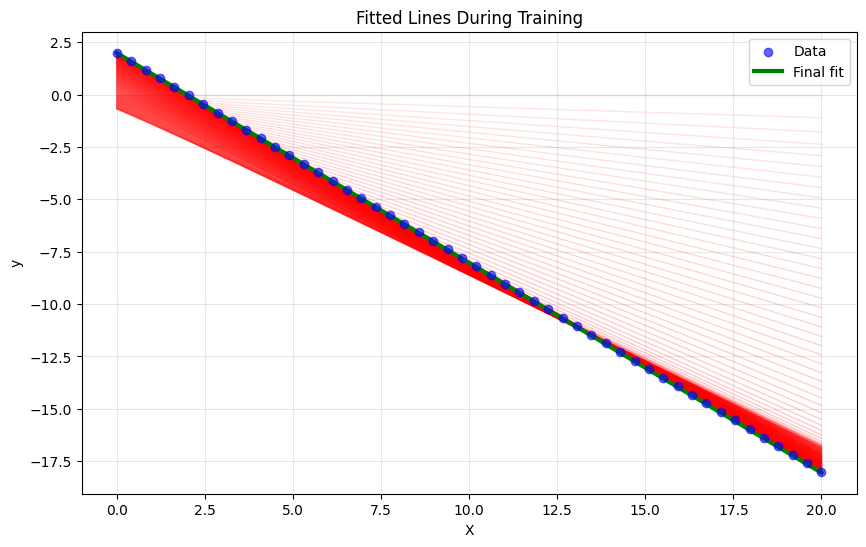

In [32]:
from sklearn.metrics import r2_score
theta_0_rms, theta_1_rms, loss_history_rms, theta0_history_rms, theta1_history_rms = \
RMSProp_grad_gd_single_var  (X, y, BETA= 0.9,LR= .005, MAX_ITER= 5000)
h_rms = theta_0_rms + theta_1_rms* X
print(r2_score(y, h_rms))
plot_loss_vs_epochs(loss_history_rms[:500], 'epochs vs loss, batch gd')
plot_theta_vs_loss(theta0_history_rms[:500], theta1_history_rms[:500], loss_history_rms[:500])
plot_fitted_lines(X, y, theta0_history_rms, theta1_history_rms, 5)


##### The following results uses alpha = 0.0005, beta = 0.9, epsilon =  1e-08, and max. iterations = 5000.

0.9933427141179116


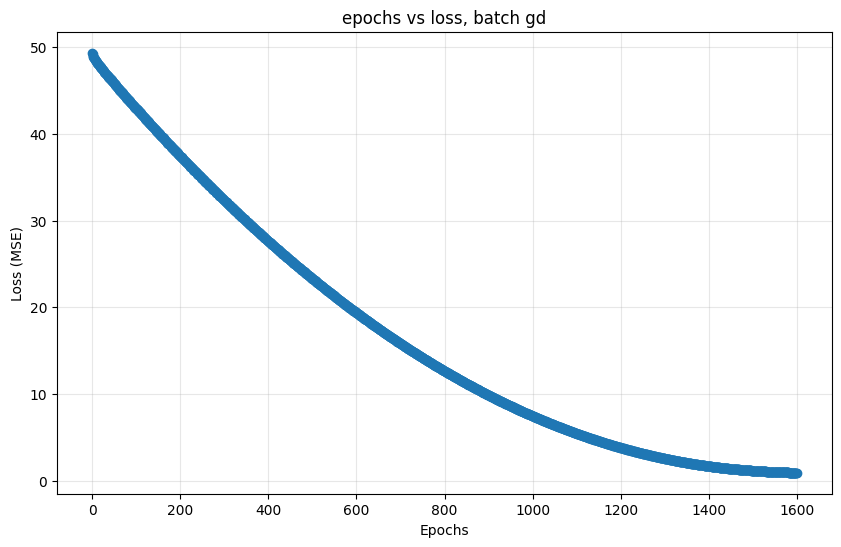

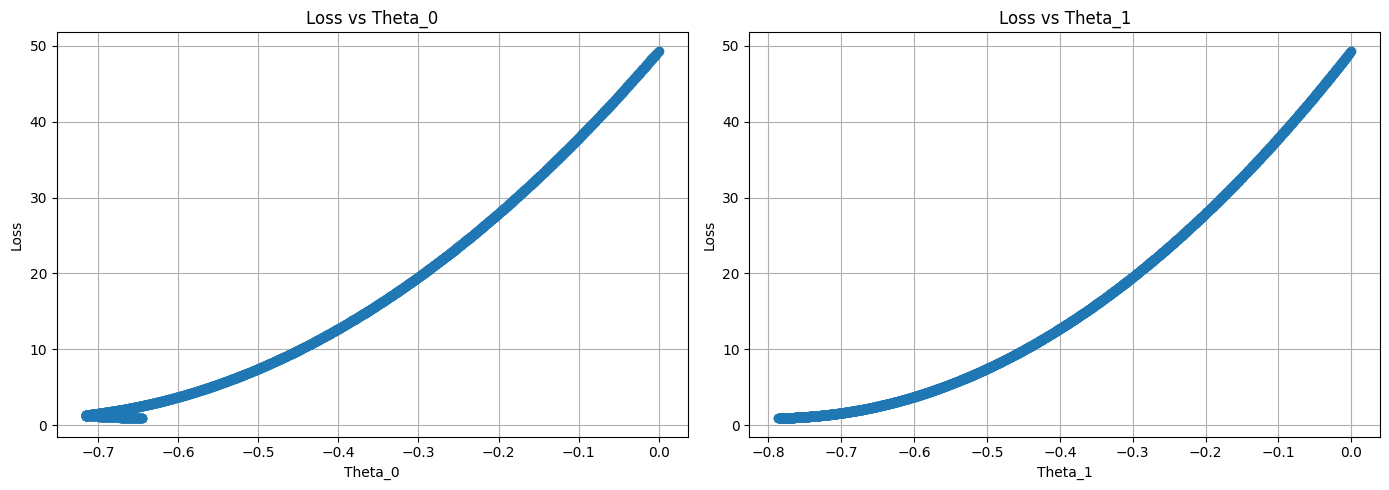

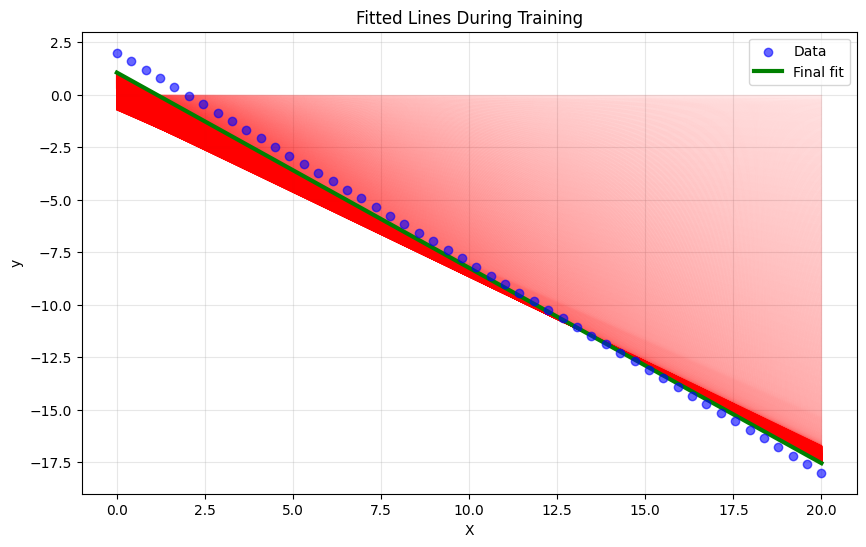

In [34]:
from sklearn.metrics import r2_score
theta_0_rms, theta_1_rms, loss_history_rms, theta0_history_rms, theta1_history_rms = \
RMSProp_grad_gd_single_var  (X, y, BETA= 0.9,LR= .0005, MAX_ITER= 5000)
h_rms = theta_0_rms + theta_1_rms* X
print(r2_score(y, h_rms))
plot_loss_vs_epochs(loss_history_rms[:1600], 'epochs vs loss, batch gd')
plot_theta_vs_loss(theta0_history_rms[:1600], theta1_history_rms[:1600], loss_history_rms[:1600])
plot_fitted_lines(X, y, theta0_history_rms, theta1_history_rms, 5)


##### The following results uses alpha = 0.0005, beta = 0.1, epsilon =  1e-08, and max. iterations = 5000.

0.9932343068903501


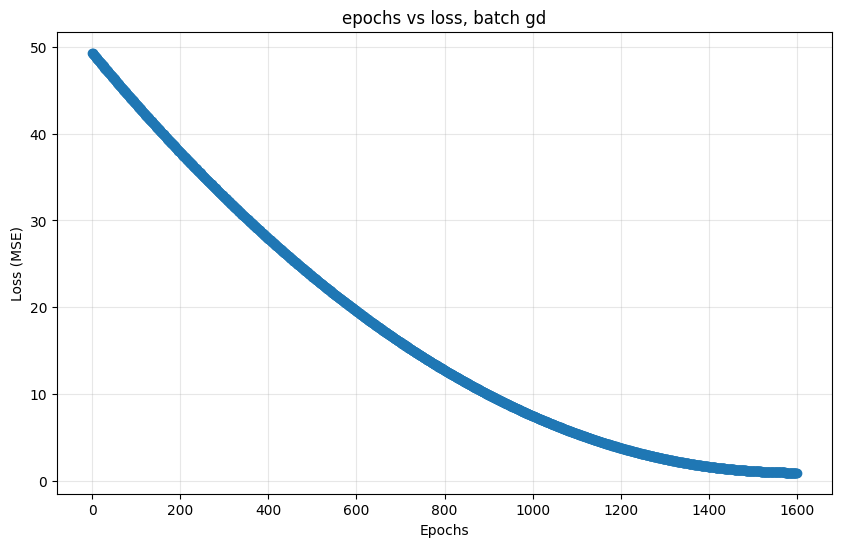

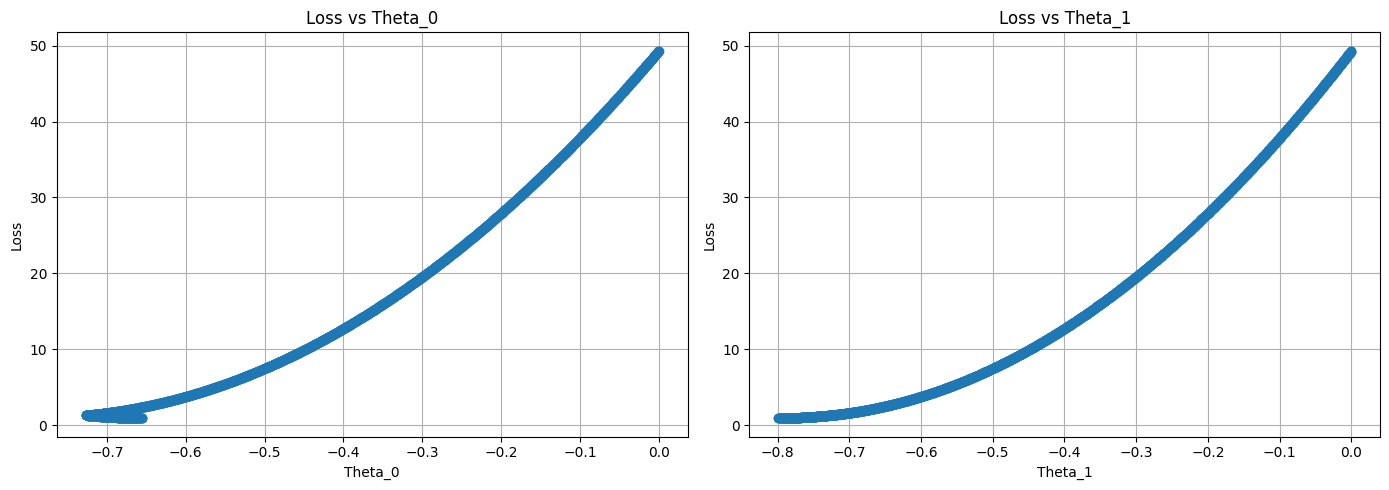

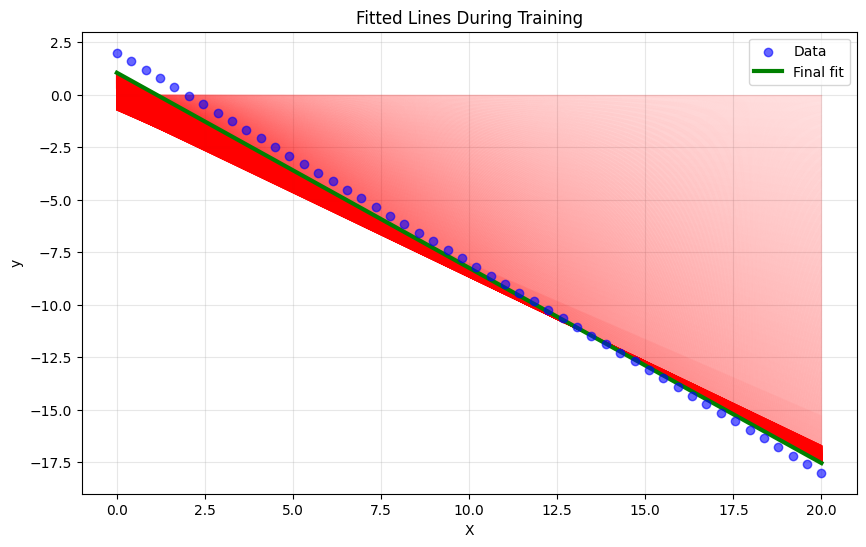

In [63]:
from sklearn.metrics import r2_score
theta_0_rms, theta_1_rms, loss_history_rms, theta0_history_rms, theta1_history_rms = \
RMSProp_grad_gd_single_var  (X, y, BETA= 0.1,LR= .0005, MAX_ITER= 5000)
h_rms = theta_0_rms + theta_1_rms* X
print(r2_score(y, h_rms))
plot_loss_vs_epochs(loss_history_rms[:1600], 'epochs vs loss, batch gd')
plot_theta_vs_loss(theta0_history_rms[:1600], theta1_history_rms[:1600], loss_history_rms[:1600])
plot_fitted_lines(X, y, theta0_history_rms, theta1_history_rms, 5)


## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

In [47]:
def ADAM_grad_gd_single_var(X, y, BETA_M = 0.9, BETA_V = .09, LR=0.01, TOL=1E-6, MAX_ITER=1000):
   
    m = len(X)
    
    # Initialize
    theta_0 = 0.0
    theta_1 = 0.0

    # momentum -> keeping previous history
    momentum_0 = 0
    momentum_1 = 0

    # v_t -> weighting the momentum
    vt_0 = 0
    vt_1 = 1
    
    loss_history = []
    theta0_history = []
    theta1_history = []
    
    for iter in range(1,MAX_ITER+1):
        # Predict
        h_x = theta_0 + theta_1 * X
        
        # Loss
        error = h_x - y
        j = np.sum(error**2) / (2 * m)
        
        loss_history.append(j)
        

        # Grad
        grad_theta_0 = (1/m) * np.sum(error)
        grad_theta_1 = (1/m) * np.sum(error * X)

        # momentum & its weigting
        momentum_0 = BETA_M * momentum_0 + (1-BETA_M) * (grad_theta_0)
        momentum_1 = BETA_M * momentum_1 + (1-BETA_M) * (grad_theta_1 )

        vt_0  = BETA_V * vt_0 + (1-BETA_V) * (grad_theta_0**2)
        vt_1  = BETA_V * vt_1 + (1-BETA_V) * (grad_theta_1**2)
        # Update parameters SIMULTANEOUSLY
        theta_0 -= (1/(np.sqrt(vt_0) + 1E-8 )) * LR * momentum_0
        theta_1 -= (1/(np.sqrt(vt_1) + 1E-8 )) * LR * momentum_1
        
        theta0_history.append(theta_0)
        theta1_history.append(theta_1)
        
        
        # Convergence check
        if iter > 1 and np.abs(loss_history[-1] - loss_history[-2]) < TOL:
            print(f'Converged at iteration {iter}')
            break
    
    return theta_0, theta_1, loss_history, theta0_history, theta1_history

##### The following results uses alpha = 0.05, beta1 = 0.2, beta2 = 0.7, epsilon =  1e-08, and max. iterations = 500.

Converged at iteration 278
0.9999999478774233


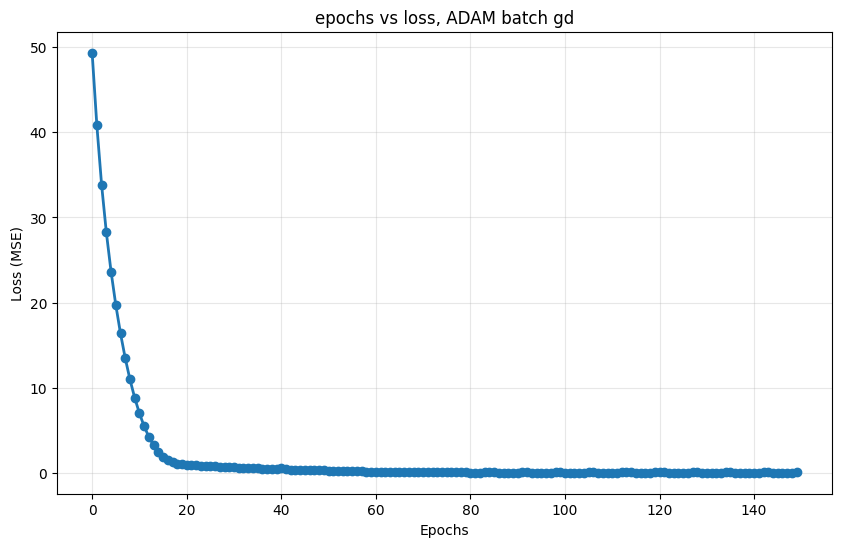

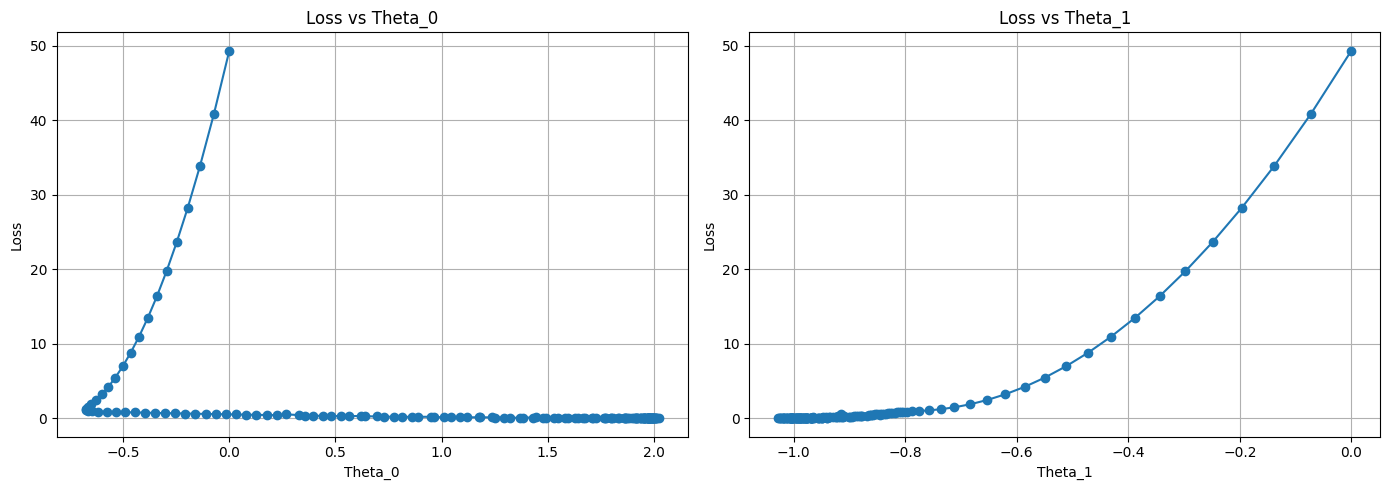

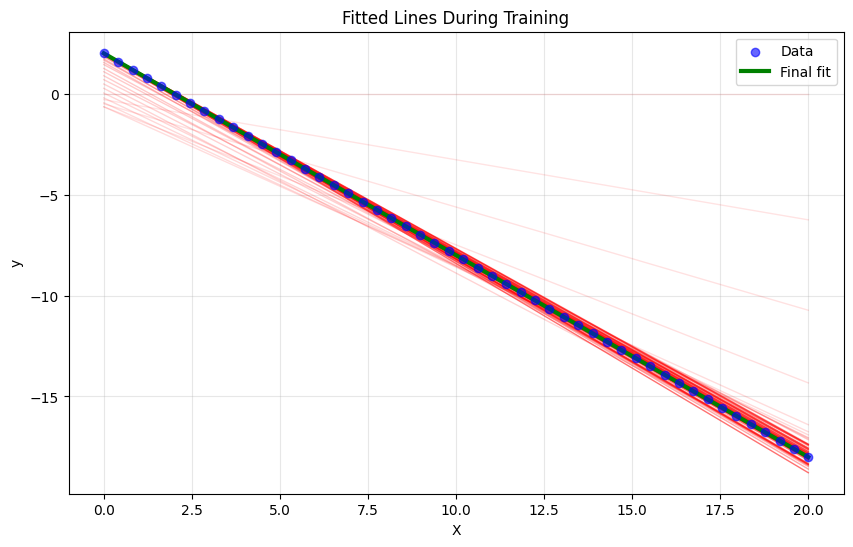

In [40]:
from sklearn.metrics import r2_score
theta_0_ADAM, theta_1_ADAM, loss_history_ADAM, theta0_history_ADAM, theta1_history_ADAM = \
ADAM_grad_gd_single_var  (X, y, BETA_M= 0.2, BETA_V= .7, LR= .05, MAX_ITER= 500)
h_ADAM = theta_0_ADAM+ theta_1_ADAM* X
print(r2_score(y, h_ADAM))
plot_loss_vs_epochs(loss_history_ADAM[:150], 'epochs vs loss, ADAM batch gd')
plot_theta_vs_loss(theta0_history_ADAM[:150], theta1_history_ADAM[:150], loss_history_ADAM[:150])
plot_fitted_lines(X, y, theta0_history_ADAM, theta1_history_ADAM, 5)


##### The following results uses alpha = 0.005, beta1 = 0.5, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 500.

0.9928220764714325


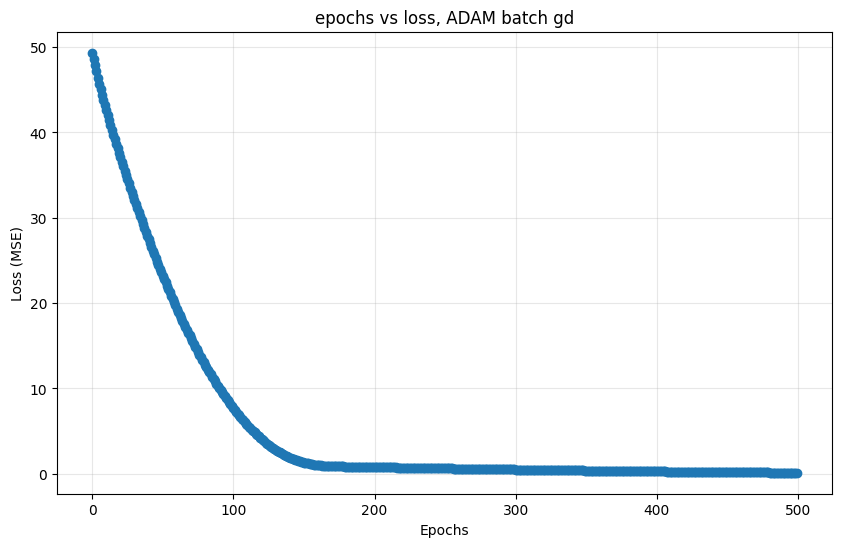

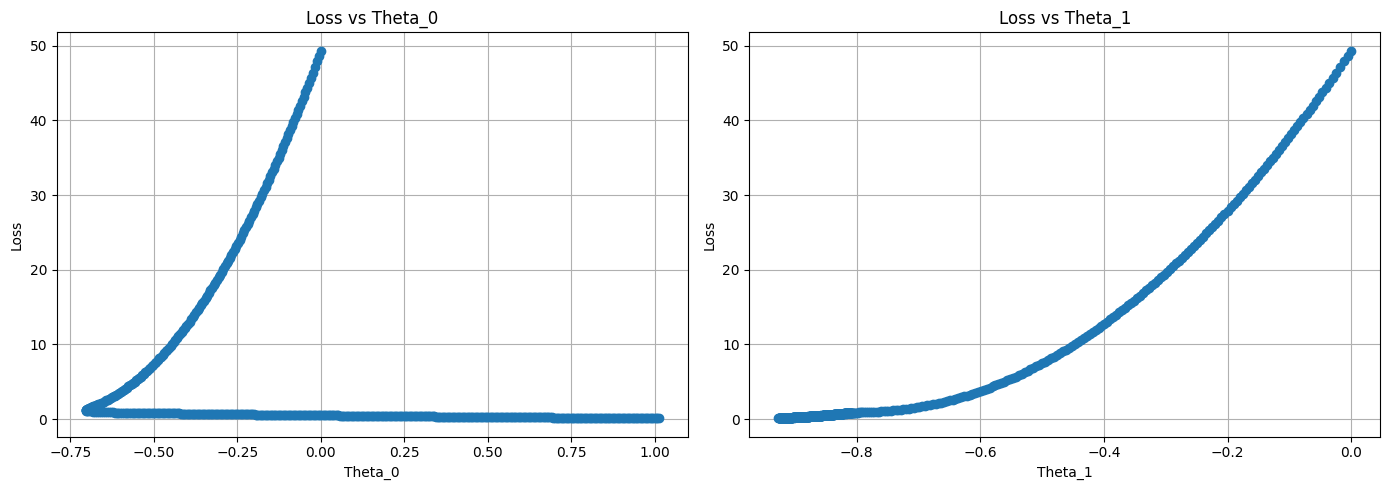

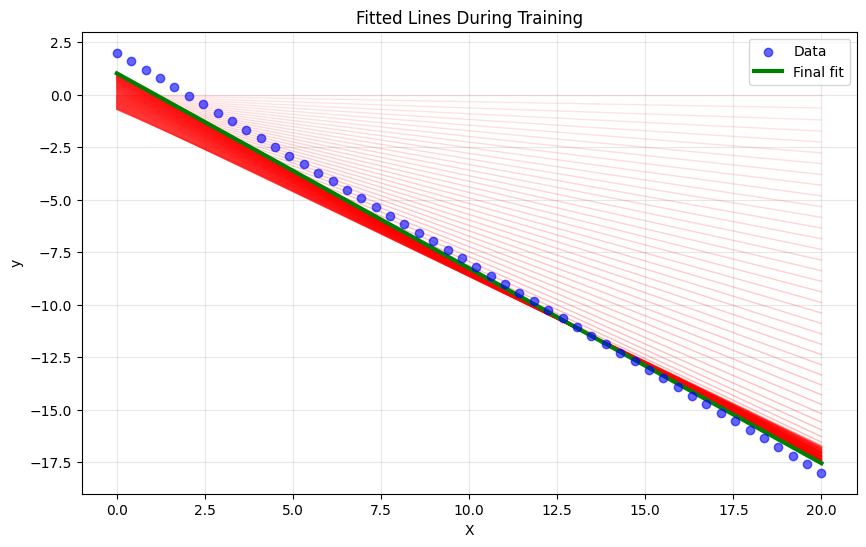

In [42]:
from sklearn.metrics import r2_score
theta_0_ADAM, theta_1_ADAM, loss_history_ADAM, theta0_history_ADAM, theta1_history_ADAM = \
ADAM_grad_gd_single_var  (X, y, BETA_M= 0.5, BETA_V= .8, LR= .005, MAX_ITER= 500)
h_ADAM = theta_0_ADAM+ theta_1_ADAM* X
print(r2_score(y, h_ADAM))
plot_loss_vs_epochs(loss_history_ADAM[:500], 'epochs vs loss, ADAM batch gd')
plot_theta_vs_loss(theta0_history_ADAM[:500], theta1_history_ADAM[:500], loss_history_ADAM[:500])
plot_fitted_lines(X, y, theta0_history_ADAM, theta1_history_ADAM, 5)


##### The following results uses alpha = 0.0005, beta1 = 0.8, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 5000.

0.9931112203790972


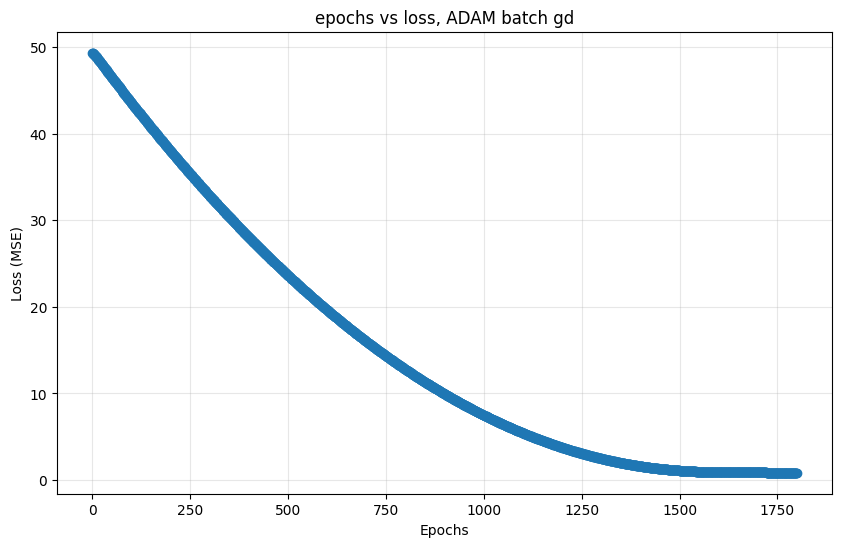

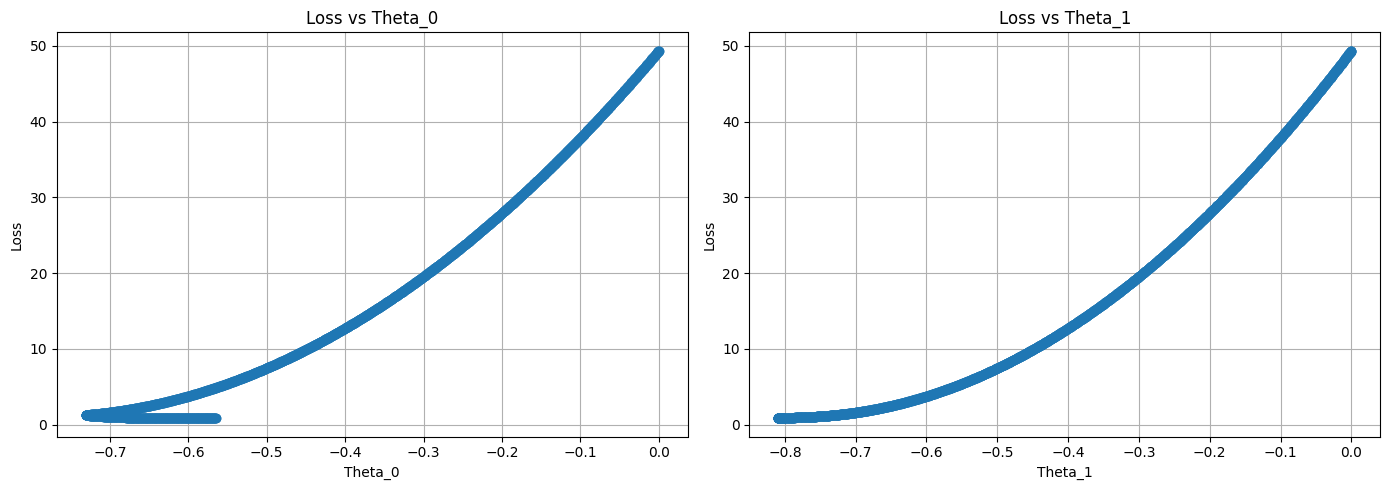

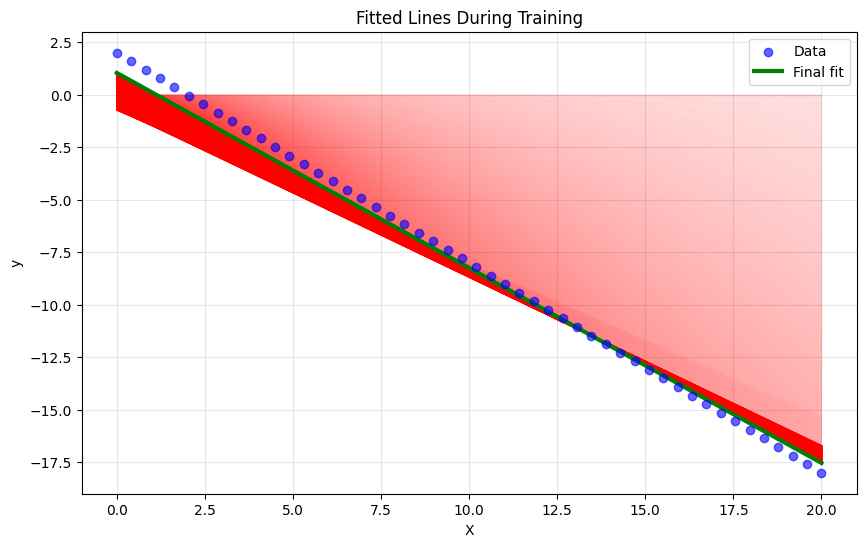

In [45]:
from sklearn.metrics import r2_score
theta_0_ADAM, theta_1_ADAM, loss_history_ADAM, theta0_history_ADAM, theta1_history_ADAM = \
ADAM_grad_gd_single_var  (X, y, BETA_M= 0.8, BETA_V= .7, LR= .0005, MAX_ITER= 5000)
h_ADAM = theta_0_ADAM+ theta_1_ADAM* X
print(r2_score(y, h_ADAM))
plot_loss_vs_epochs(loss_history_ADAM[:1800], 'epochs vs loss, ADAM batch gd')
plot_theta_vs_loss(theta0_history_ADAM[:1800], theta1_history_ADAM[:1800], loss_history_ADAM[:1800])
plot_fitted_lines(X, y, theta0_history_ADAM, theta1_history_ADAM, 5)


### Play with the parameters and see the results

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

Converged at iteration 3934
0.9999982178751281


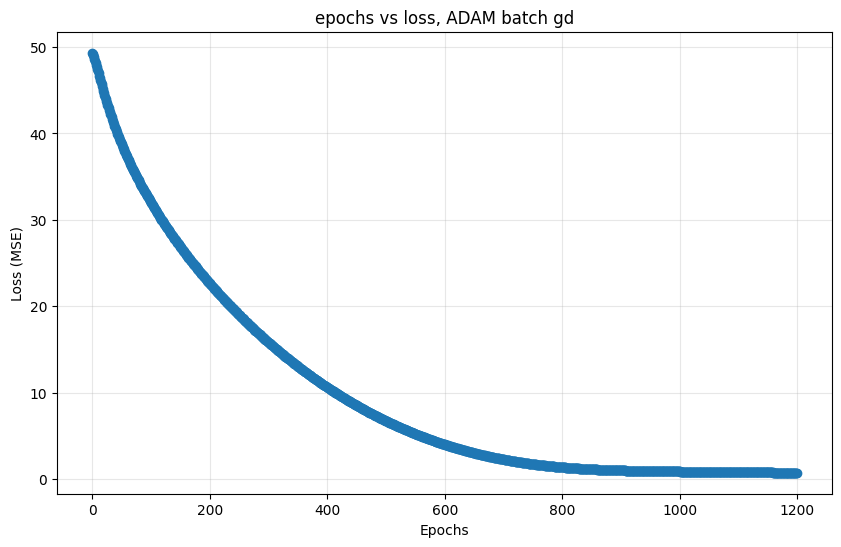

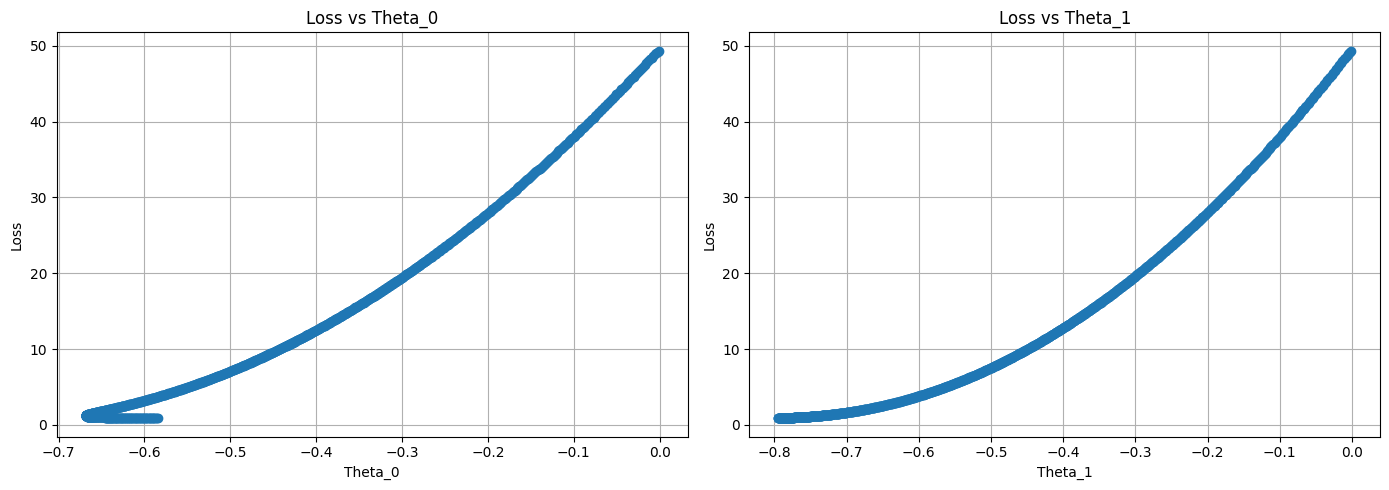

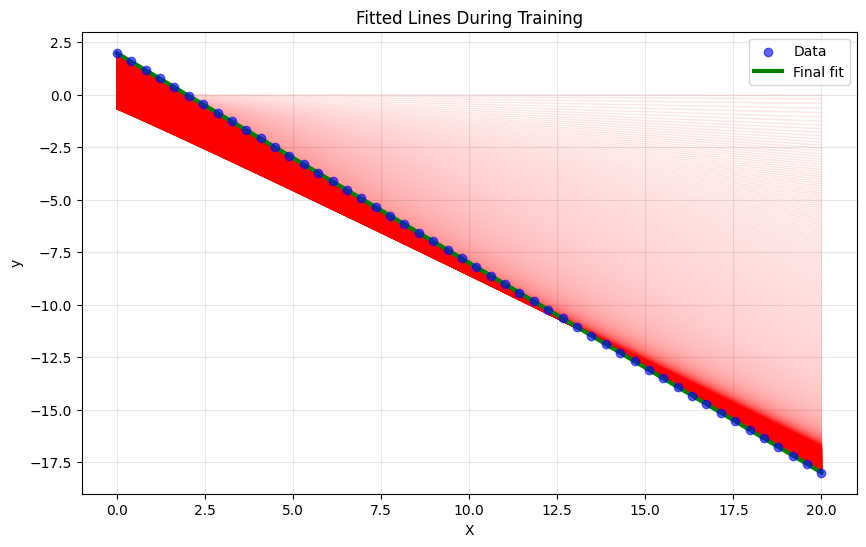

In [53]:
from sklearn.metrics import r2_score
theta_0_ADAM, theta_1_ADAM, loss_history_ADAM, theta0_history_ADAM, theta1_history_ADAM = \
ADAM_grad_gd_single_var  (X, y, BETA_M= 0.9, BETA_V= .99, LR= .001, MAX_ITER= 5000)
h_ADAM = theta_0_ADAM+ theta_1_ADAM* X
print(r2_score(y, h_ADAM))
plot_loss_vs_epochs(loss_history_ADAM [:1200], 'epochs vs loss, ADAM batch gd')
plot_theta_vs_loss(theta0_history_ADAM[:1000], theta1_history_ADAM[:1000], loss_history_ADAM[:1000])
plot_fitted_lines(X, y, theta0_history_ADAM, theta1_history_ADAM, 5)


##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.

Converged at iteration 3455
0.9999981421948448


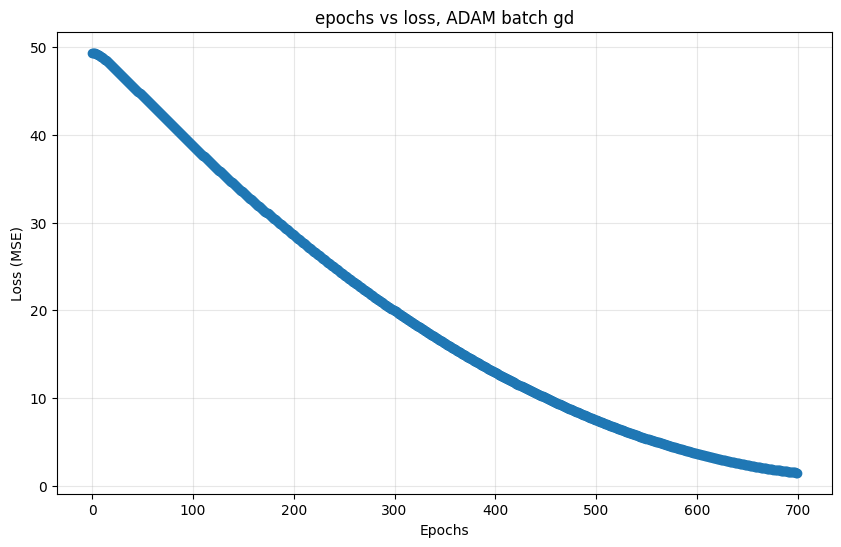

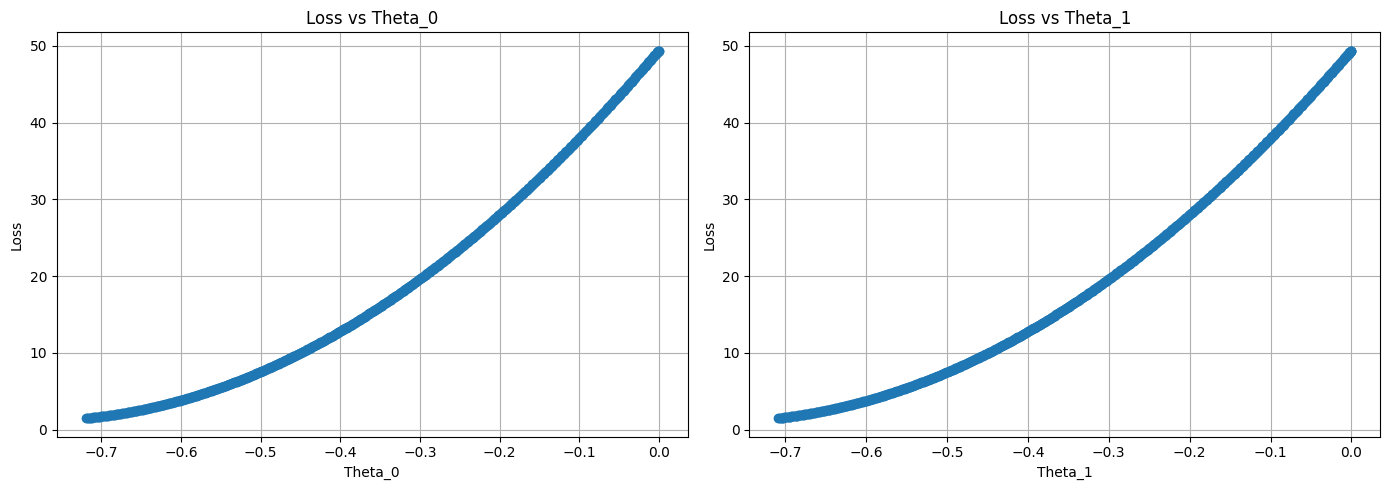

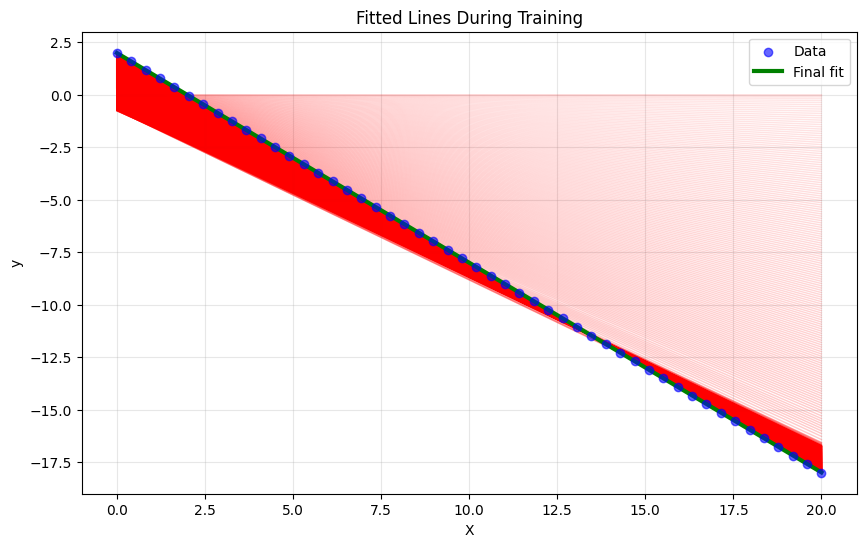

In [55]:
from sklearn.metrics import r2_score
theta_0_ADAM, theta_1_ADAM, loss_history_ADAM, theta0_history_ADAM, theta1_history_ADAM = \
ADAM_grad_gd_single_var  (X, y, BETA_M= 0.9, BETA_V= .5, LR= .001, MAX_ITER= 5000)
h_ADAM = theta_0_ADAM+ theta_1_ADAM* X
print(r2_score(y, h_ADAM))
plot_loss_vs_epochs(loss_history_ADAM [:700], 'epochs vs loss, ADAM batch gd')
plot_theta_vs_loss(theta0_history_ADAM[:700], theta1_history_ADAM[:700], loss_history_ADAM[:700])
plot_fitted_lines(X, y, theta0_history_ADAM, theta1_history_ADAM, 5)


##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

Converged at iteration 3744
0.9999398049248537


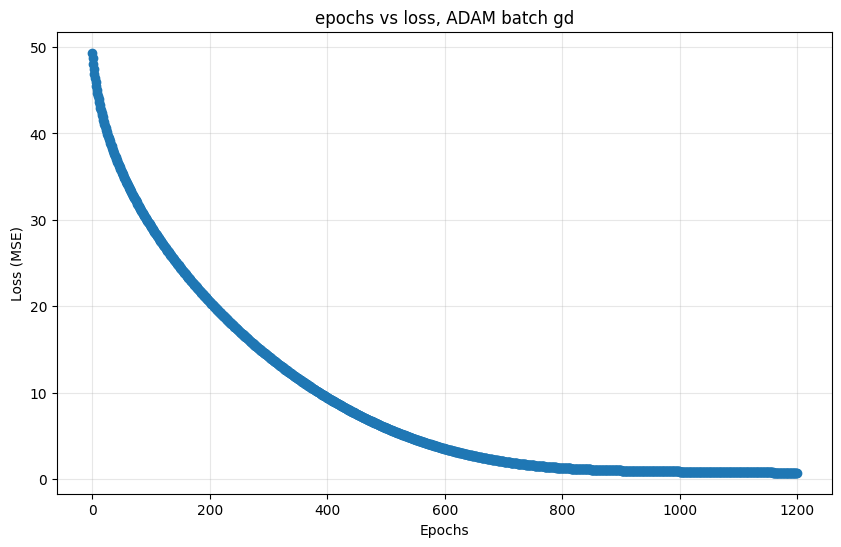

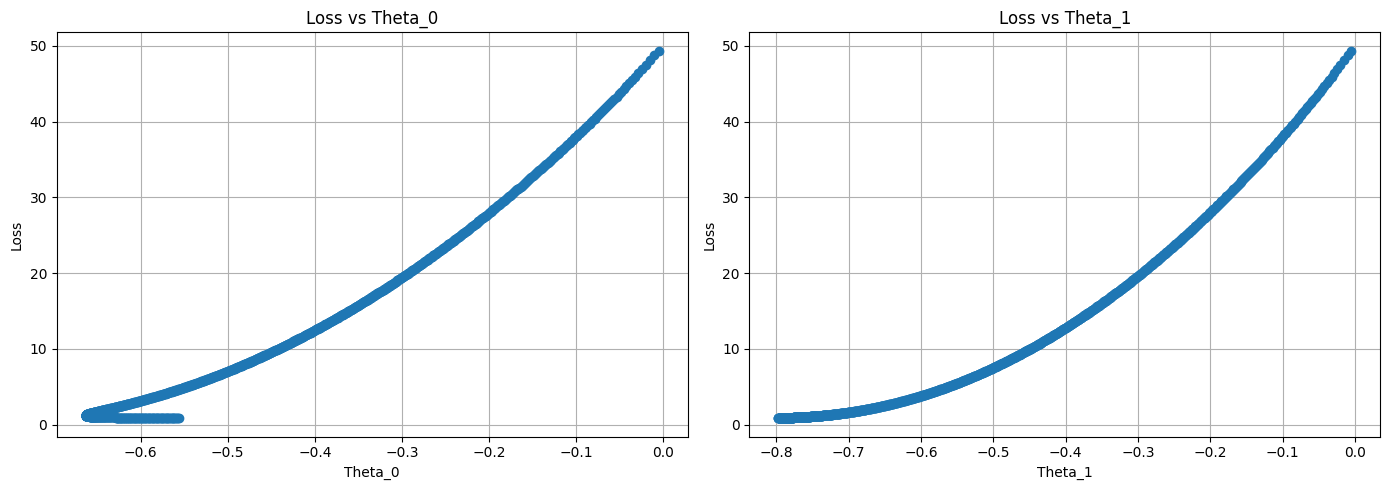

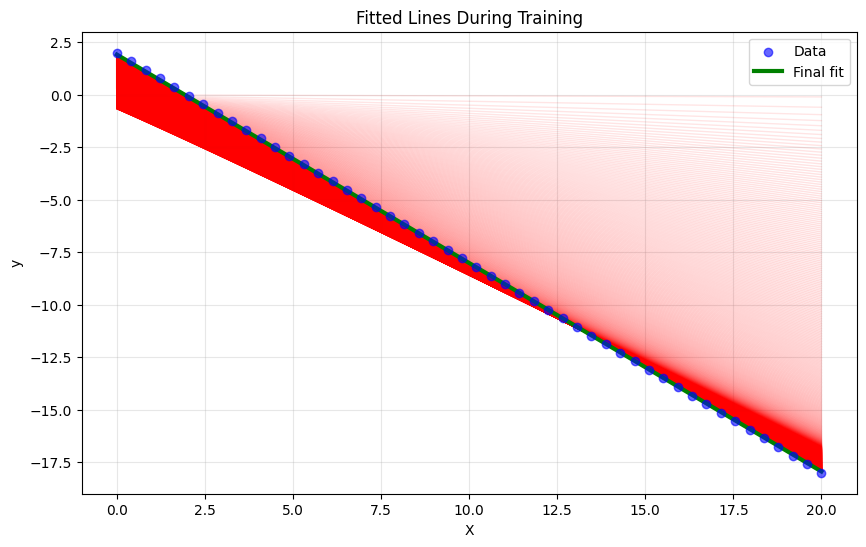

In [56]:
from sklearn.metrics import r2_score
theta_0_ADAM, theta_1_ADAM, loss_history_ADAM, theta0_history_ADAM, theta1_history_ADAM = \
ADAM_grad_gd_single_var  (X, y, BETA_M= 0.5, BETA_V= .99, LR= .001, MAX_ITER= 5000)
h_ADAM = theta_0_ADAM+ theta_1_ADAM* X
print(r2_score(y, h_ADAM))
plot_loss_vs_epochs(loss_history_ADAM [:1200], 'epochs vs loss, ADAM batch gd')
plot_theta_vs_loss(theta0_history_ADAM[:1000], theta1_history_ADAM[:1000], loss_history_ADAM[:1000])
plot_fitted_lines(X, y, theta0_history_ADAM, theta1_history_ADAM, 5)


##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.

Converged at iteration 3446
0.999998211388908


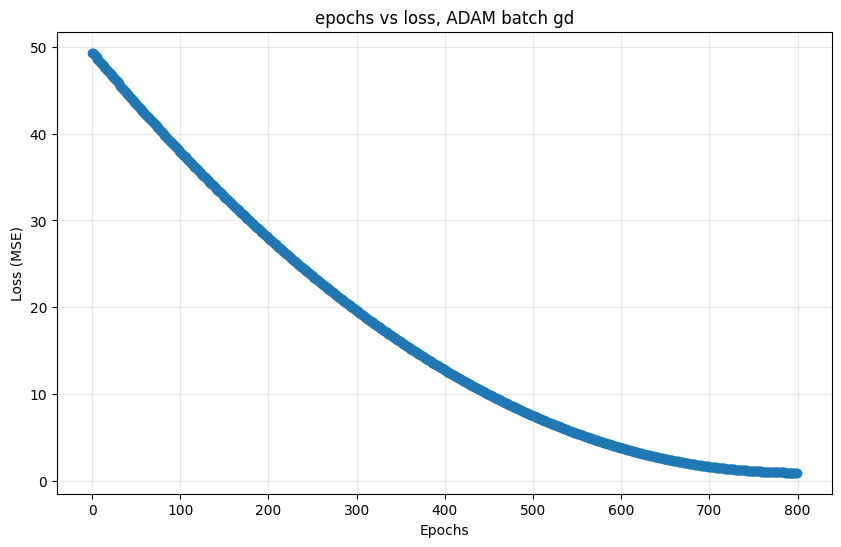

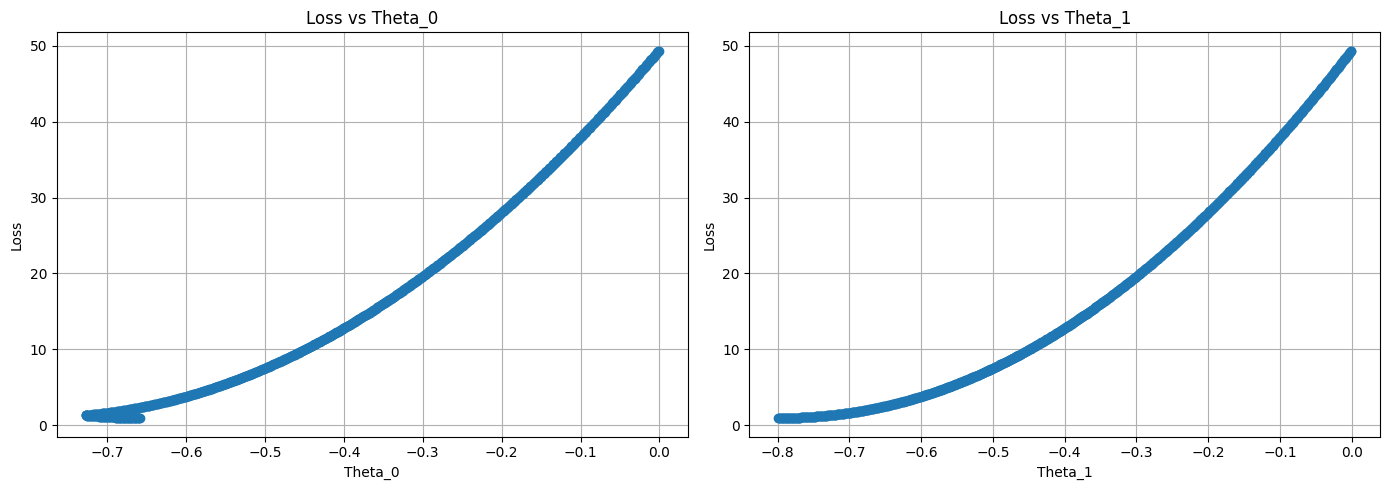

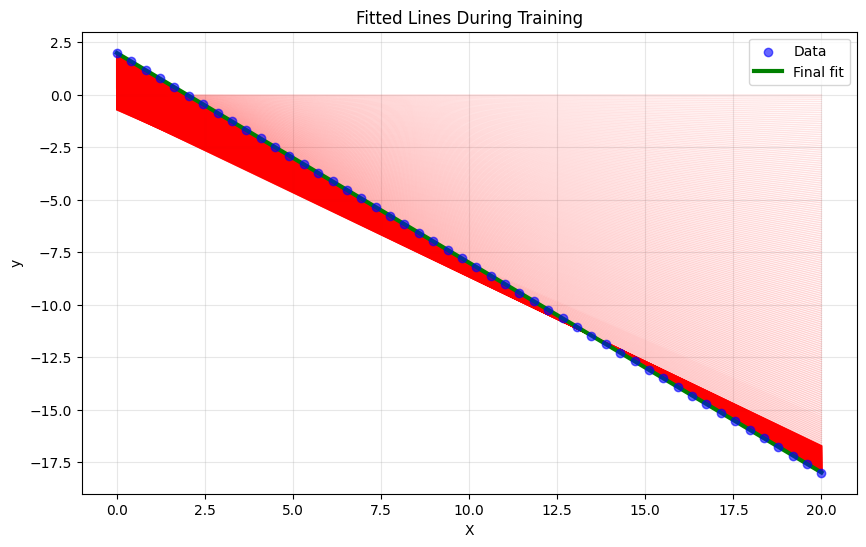

In [58]:
from sklearn.metrics import r2_score
theta_0_ADAM, theta_1_ADAM, loss_history_ADAM, theta0_history_ADAM, theta1_history_ADAM = \
ADAM_grad_gd_single_var  (X, y, BETA_M= 0.5, BETA_V= .5, LR= .001, MAX_ITER= 5000)
h_ADAM = theta_0_ADAM+ theta_1_ADAM* X
print(r2_score(y, h_ADAM))
plot_loss_vs_epochs(loss_history_ADAM [:800], 'epochs vs loss, ADAM batch gd')
plot_theta_vs_loss(theta0_history_ADAM[:800], theta1_history_ADAM[:800], loss_history_ADAM[:800])
plot_fitted_lines(X, y, theta0_history_ADAM, theta1_history_ADAM, 5)


##### The following results uses alpha = 0.01, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

Converged at iteration 787
0.9999992128592603


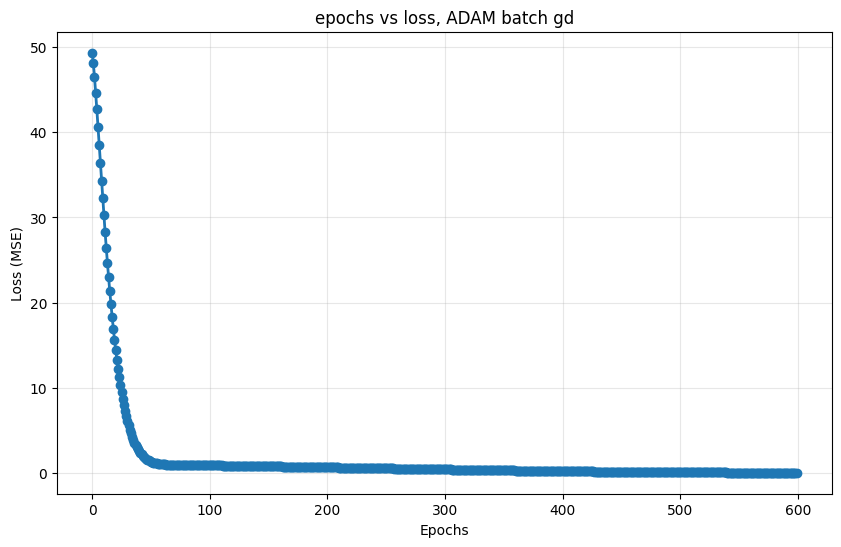

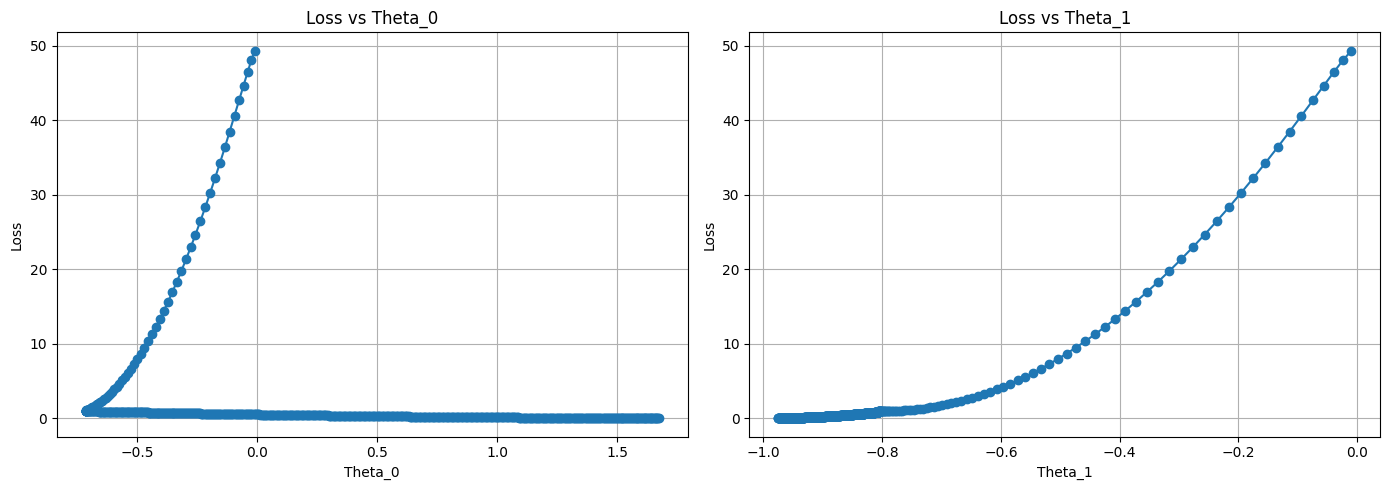

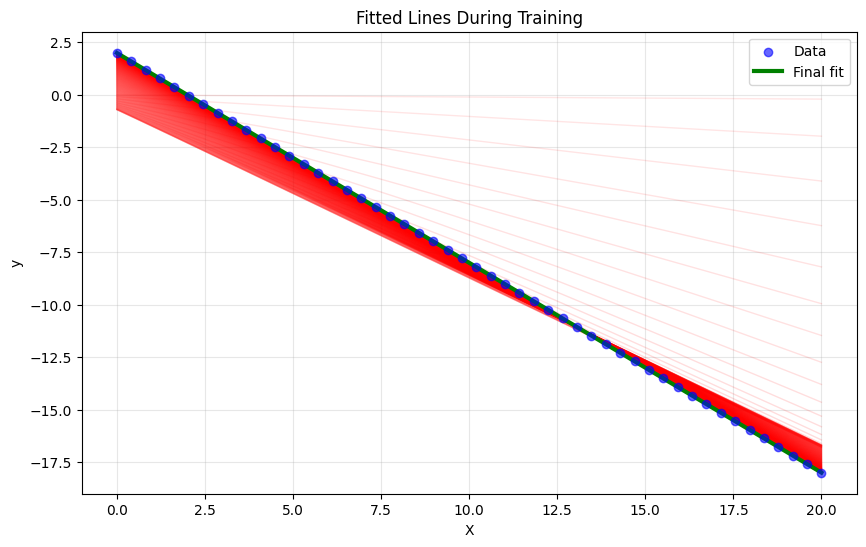

In [60]:
from sklearn.metrics import r2_score
theta_0_ADAM, theta_1_ADAM, loss_history_ADAM, theta0_history_ADAM, theta1_history_ADAM = \
ADAM_grad_gd_single_var  (X, y, BETA_M= 0.9, BETA_V= .99, LR= .01, MAX_ITER= 5000)
h_ADAM = theta_0_ADAM+ theta_1_ADAM* X
print(r2_score(y, h_ADAM))
plot_loss_vs_epochs(loss_history_ADAM [:600], 'epochs vs loss, ADAM batch gd')
plot_theta_vs_loss(theta0_history_ADAM[:600], theta1_history_ADAM[:600], loss_history_ADAM[:600])
plot_fitted_lines(X, y, theta0_history_ADAM, theta1_history_ADAM, 5)


Converged at iteration 4182
0.9987226272723592


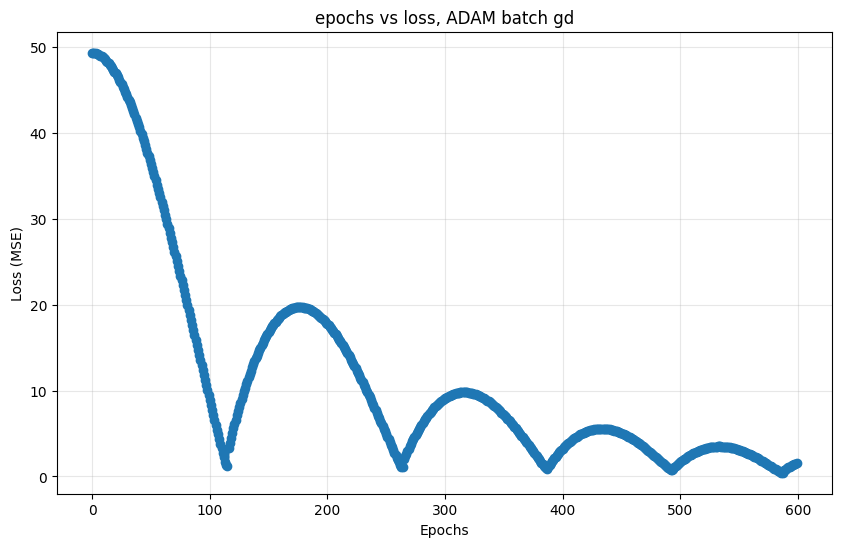

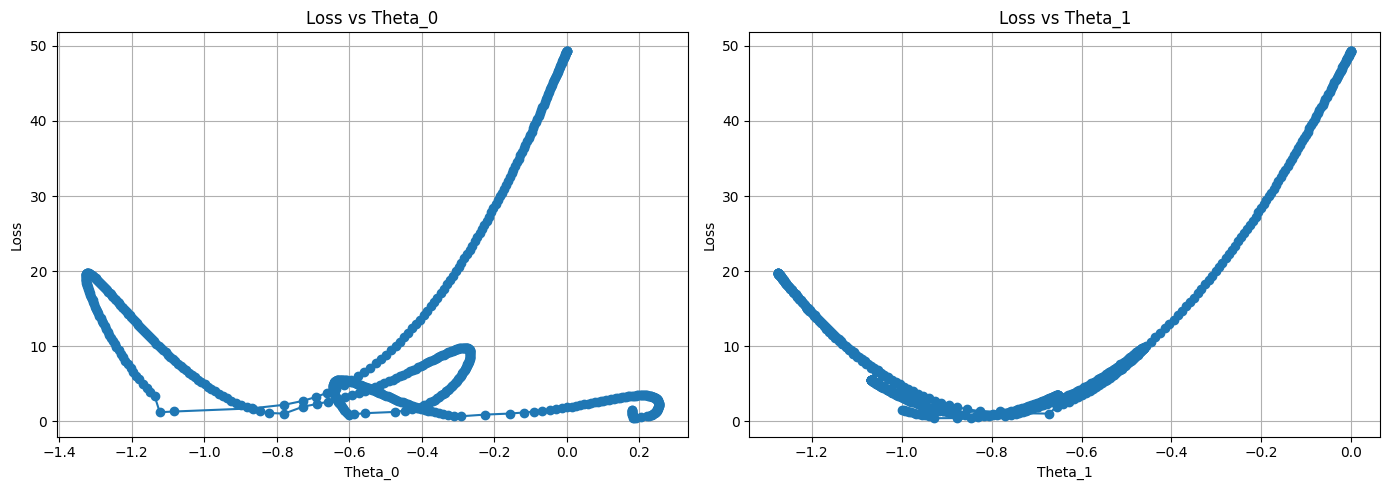

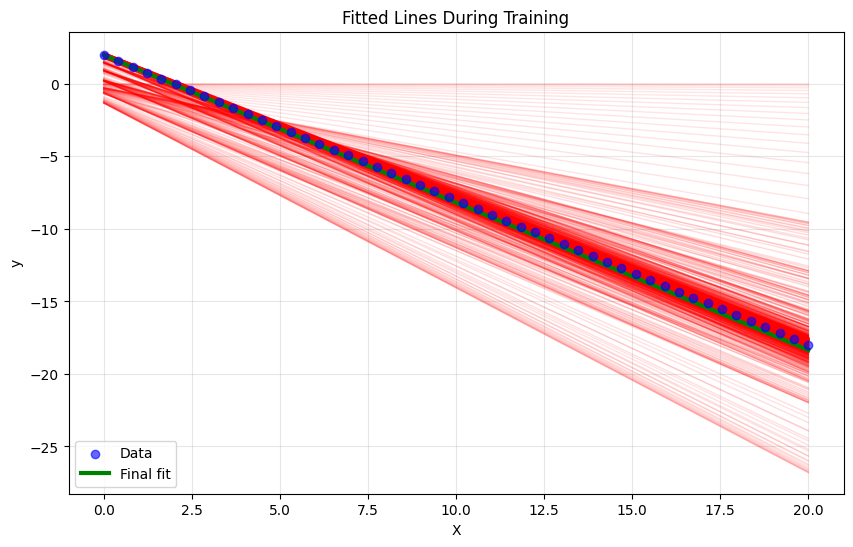

In [75]:
from sklearn.metrics import r2_score
theta_0_ADAM, theta_1_ADAM, loss_history_ADAM, theta0_history_ADAM, theta1_history_ADAM = \
ADAM_grad_gd_single_var  (X, y, BETA_M= .99, BETA_V= .1, LR= .01, MAX_ITER= 5000)
h_ADAM = theta_0_ADAM+ theta_1_ADAM* X
print(r2_score(y, h_ADAM))
plot_loss_vs_epochs(loss_history_ADAM [:600], 'epochs vs loss, ADAM batch gd')
plot_theta_vs_loss(theta0_history_ADAM[:600], theta1_history_ADAM[:600], loss_history_ADAM[:600])
plot_fitted_lines(X, y, theta0_history_ADAM, theta1_history_ADAM, 5)


## Congratulations 
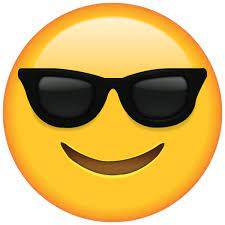